# Project Name

Heart Disease Prediction and Risk Analysis

Project Summary:

This project focuses on analyzing a heart disease dataset compiled from UCI sources and building machine learning models to predict the presence of heart disease. The workflow includes exploratory data analysis (EDA), feature preprocessing, model training, and evaluation. By applying algorithms such as Logistic Regression, Random Forest, and KNN, we aim to identify key risk factors and provide accurate predictions.

# GitHub Link:

# Problem Statement:

Heart disease is one of the leading causes of mortality worldwide. Early detection is crucial to reduce risks and provide timely treatment. However, diagnosis often requires extensive tests and may vary across patients. Using machine learning models, we can predict the likelihood of heart disease based on patient medical attributes, enabling faster decision-making and better healthcare support.

#  Step 1: Install & Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    roc_auc_score
)

In [4]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

#  Step 2: Load the Dataset


In [7]:
uploaded = files.upload()

Saving UCI_Heart_Disease_Dataset.csv to UCI_Heart_Disease_Dataset.csv


# What Did You Know About the Dataset?

The dataset is compiled from UCI repositories and Kaggle.

It contains 11 columns with both numerical and categorical attributes.

The target variable HeartDisease is binary (0 = No Disease, 1 = Disease).

The dataset is balanced, which helps in building stable classification models.

# Understanding Variables

The dataset includes demographic, medical, and lifestyle attributes that can influence heart disease.

In [9]:
df = pd.read_csv("UCI_Heart_Disease_Dataset.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2943, 11)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


# Variable Description:

Age: Age of the patient (years)

Sex: Male or Female

ChestPainType: Type of chest pain experienced (ATA, NAP, TA, ASY)

RestingBP: Resting blood pressure (mm Hg)

Cholesterol: Serum cholesterol (mg/dl)

FastingBS: Fasting blood sugar (>120 mg/dl) (0 or 1)

RestingECG: Resting electrocardiogram results (Normal, ST, LVH)

MaxHR: Maximum heart rate achieved

ExerciseAngina: Exercise induced angina (Yes/No)

Oldpeak: ST depression induced by exercise

HeartDisease: Target variable (0 = No, 1 = Yes)

# Step 3: Exploratory Data Analysis (EDA)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB
None


In [11]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64


In [12]:
print(df.describe())

               Age          Sex  ChestPainType    RestingBP  Cholesterol  \
count  2943.000000  2943.000000    2943.000000  2943.000000  2943.000000   
mean     52.381923     0.748556       1.363575   138.698267   253.515121   
std      13.037189     0.433917       1.142614    24.623198   112.724716   
min      20.000000     0.000000       0.000000     0.000000     0.000000   
25%      44.000000     0.000000       0.000000   120.500000   204.000000   
50%      54.000000     1.000000       1.000000   134.000000   248.000000   
75%      61.000000     1.000000       2.000000   150.000000   306.000000   
max      80.000000     1.000000       3.000000   200.000000   603.000000   

         FastingBS   RestingECG        MaxHR  ExerciseAngina      Oldpeak  \
count  2943.000000  2943.000000  2943.000000     2943.000000  2943.000000   
mean      0.225280     0.626911   144.040095        0.412504     1.570031   
std       0.417838     0.713650    28.446327        0.492369     1.585102   
min    

In [14]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease'],
      dtype='object')


# Data Visualization:

Countplot of Heart Disease – shows distribution of target (balanced dataset).

Boxplots of Age, Cholesterol vs HeartDisease – identify trends between features and target.

Heatmap of correlations – shows relationships between numerical features.

Barplot of ChestPainType vs HeartDisease – categorical factor influence.

# Why Did You Pick the Specific Charts?

Countplot → to confirm target balance.

Heatmap → to see feature correlations.

Boxplots → to detect outliers and compare feature distribution by target.

Barplots → to check categorical impact on heart disease.

# Distribution of target


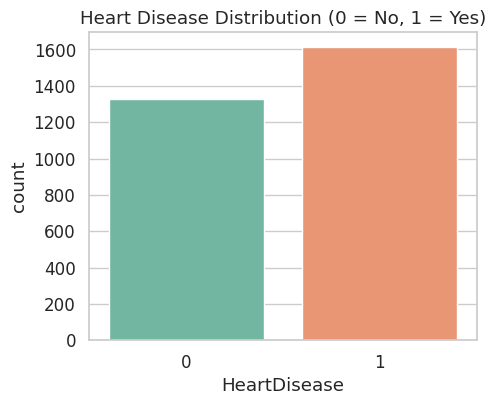

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(x="HeartDisease", hue="HeartDisease", data=df, palette="Set2", legend=False)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
# sns.countplot(x="HeartDisease", data=df, color="skyblue")
plt.show()

# Histogram + KDE


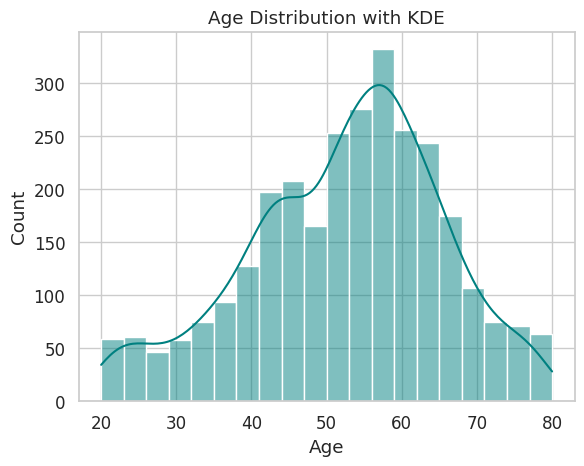

In [19]:
sns.histplot(df["Age"], kde=True, bins=20, color="teal")
plt.title("Age Distribution with KDE")
plt.show()

# Boxplot for Outlier detection


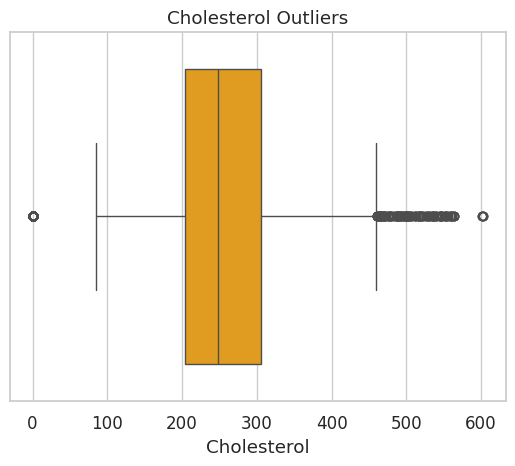

In [20]:
sns.boxplot(x=df["Cholesterol"], color="orange")
plt.title("Cholesterol Outliers")
plt.show()

# Correlation & Heatmaps


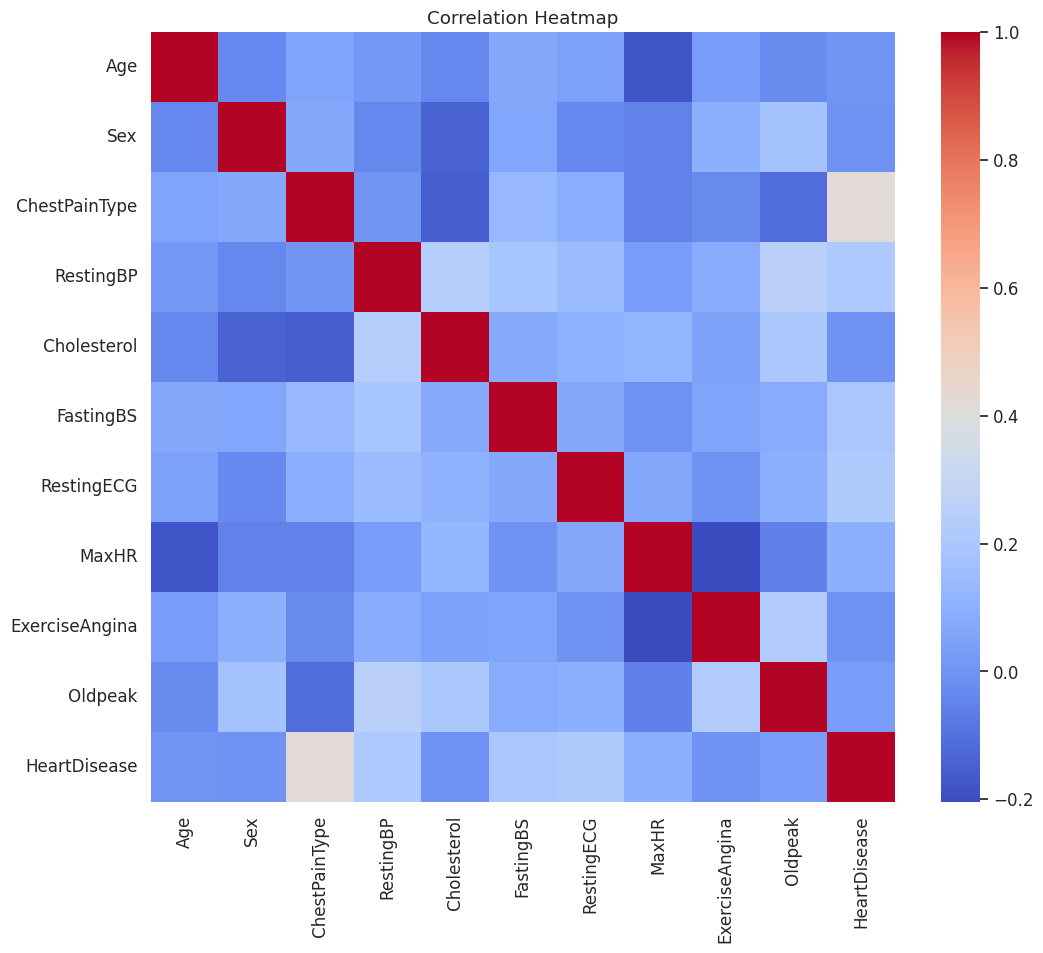

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)  # one-hot encode categoricals
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Outlier & Anomaly Detection

In [22]:
from scipy import stats

# Z-score method for RestingBP
z_scores = np.abs(stats.zscore(df["RestingBP"]))
outliers = df[z_scores > 3]
print("Outliers in RestingBP:\n", outliers[["RestingBP"]].head())

Outliers in RestingBP:
      RestingBP
449          0


# Demographic & Stratification

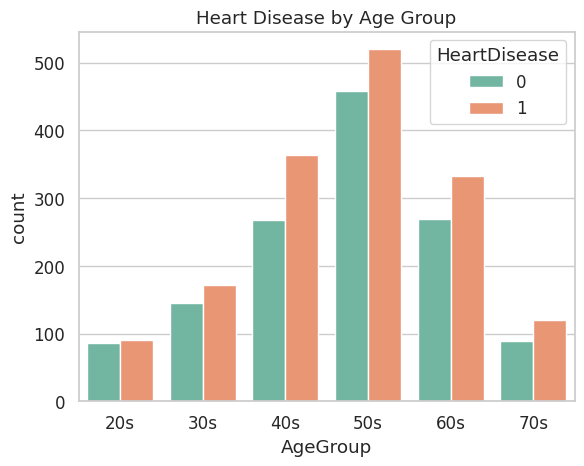

In [23]:
# Age groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,40,50,60,70,80], labels=["20s","30s","40s","50s","60s","70s"])
sns.countplot(x="AgeGroup", hue="HeartDisease", data=df, palette="Set2")
plt.title("Heart Disease by Age Group")
plt.show()

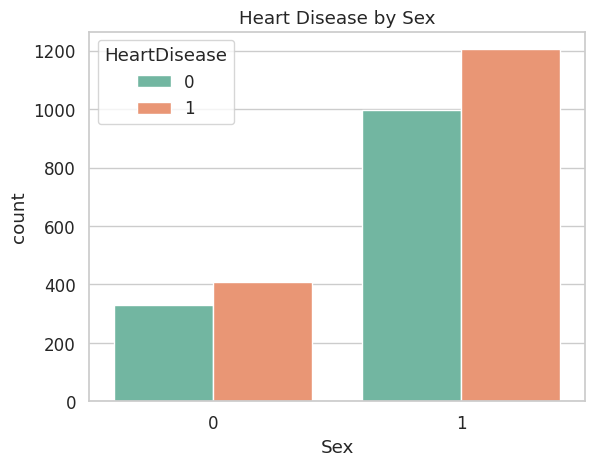

In [24]:
# Sex stratification
sns.countplot(x="Sex", hue="HeartDisease", data=df, palette="Set2")
plt.title("Heart Disease by Sex")
plt.show()

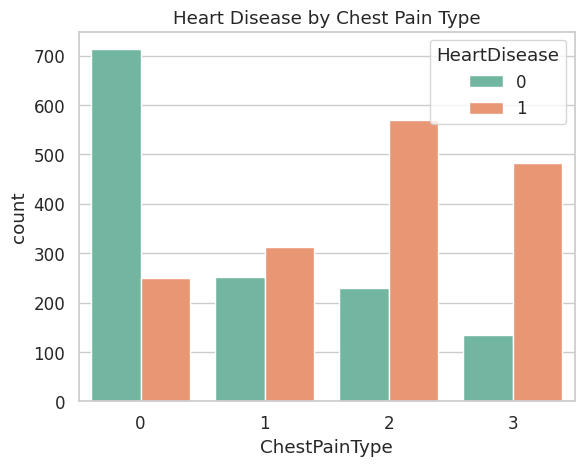

In [25]:
# Chest Pain stratification
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df, palette="Set2")
plt.title("Heart Disease by Chest Pain Type")
plt.show()

# Insights Gained:

Patients with higher cholesterol, abnormal chest pain, and exercise-induced angina are more likely to have heart disease.

Age plays an important role – risk increases with age.

Certain categorical features (like ChestPainType) show strong predictive power.

Random Forest gave the best performance with higher AUC compared to Logistic Regression and KNN.

# Step 4: Train-Test Split

In [26]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Feature Scaling

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Model Training & Evaluation Function

In [30]:
def train_eval_model(model, X_tr, X_te, y_tr, y_te, name):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_te, y_pred))
    print("Classification Report:\n", classification_report(y_te, y_pred))
    cm = confusion_matrix(y_te, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


--- Logistic Regression ---
Accuracy: 0.7232597623089984
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       266
           1       0.73      0.78      0.76       323

    accuracy                           0.72       589
   macro avg       0.72      0.72      0.72       589
weighted avg       0.72      0.72      0.72       589



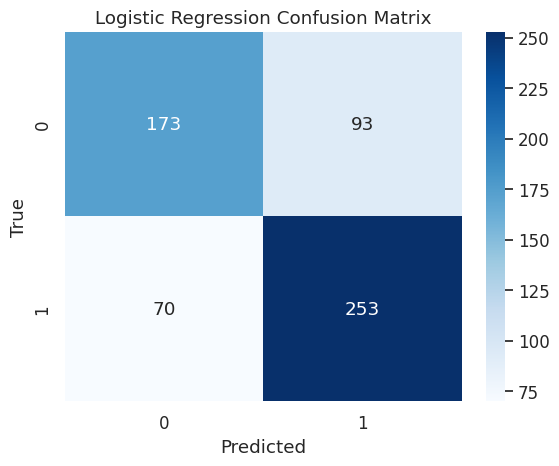

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
train_eval_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")



--- Random Forest ---
Accuracy: 0.8760611205432938
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       266
           1       0.86      0.93      0.89       323

    accuracy                           0.88       589
   macro avg       0.88      0.87      0.87       589
weighted avg       0.88      0.88      0.88       589



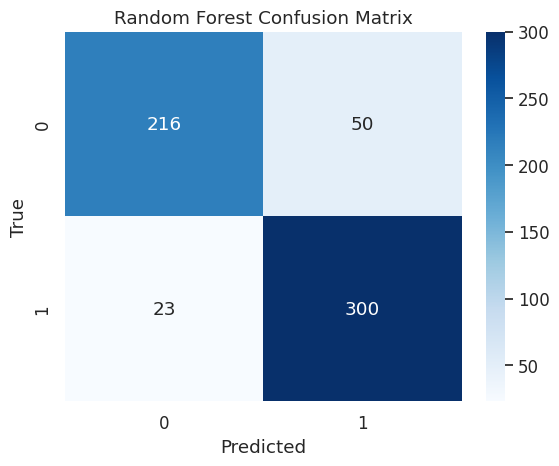

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
train_eval_model(rf, X_train, X_test, y_train, y_test, "Random Forest")


--- KNN ---
Accuracy: 0.7589134125636672
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       266
           1       0.77      0.80      0.78       323

    accuracy                           0.76       589
   macro avg       0.76      0.75      0.76       589
weighted avg       0.76      0.76      0.76       589



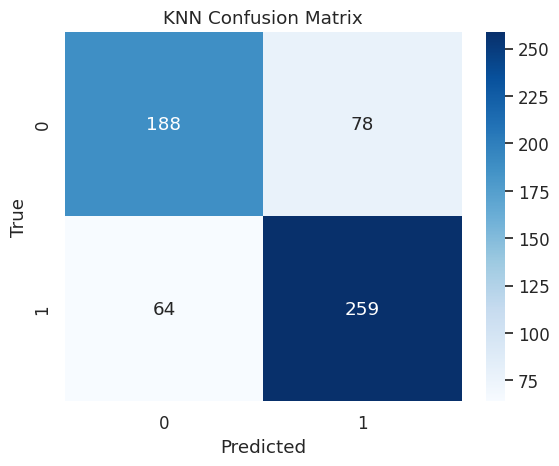

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
train_eval_model(knn, X_train_scaled, X_test_scaled, y_train, y_test, "KNN")


--- Random Forest ---
Accuracy: 0.8760611205432938
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       266
           1       0.86      0.93      0.89       323

    accuracy                           0.88       589
   macro avg       0.88      0.87      0.87       589
weighted avg       0.88      0.88      0.88       589



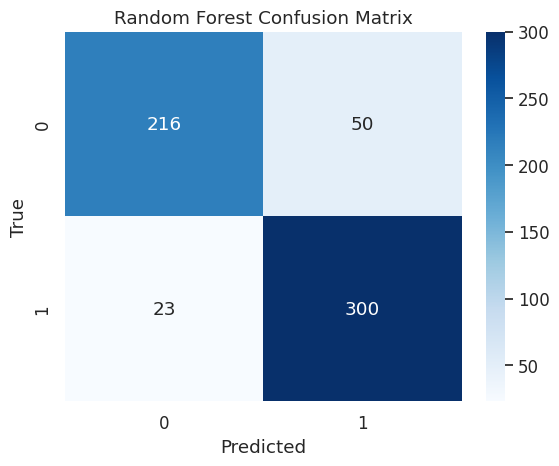

In [34]:
train_eval_model(RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test, "Random Forest")

# Step 8: Hyperparameter Tuning for Random Forest

In [35]:
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [36]:
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10, cv=3, random_state=42, n_jobs=-1
)


Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}

--- Tuned Random Forest ---
Accuracy: 0.8709677419354839
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       266
           1       0.85      0.93      0.89       323

    accuracy                           0.87       589
   macro avg       0.88      0.87      0.87       589
weighted avg       0.87      0.87      0.87       589



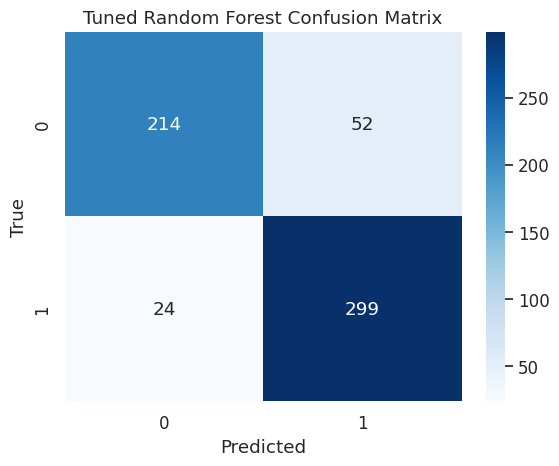

In [37]:
rs_rf.fit(X_train, y_train)
print("\nBest RF params:", rs_rf.best_params_)
best_rf = rs_rf.best_estimator_
train_eval_model(best_rf, X_train, X_test, y_train, y_test, "Tuned Random Forest")

# Step 9: ROC Curve & AUC for Logistic Regression

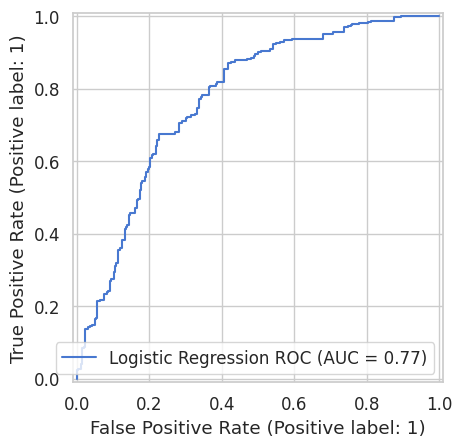

AUC: 0.7741567541143881


In [38]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]
roc_display = RocCurveDisplay.from_predictions(y_test, y_proba, name="Logistic Regression ROC")
plt.show()
print("AUC:", roc_auc_score(y_test, y_proba))

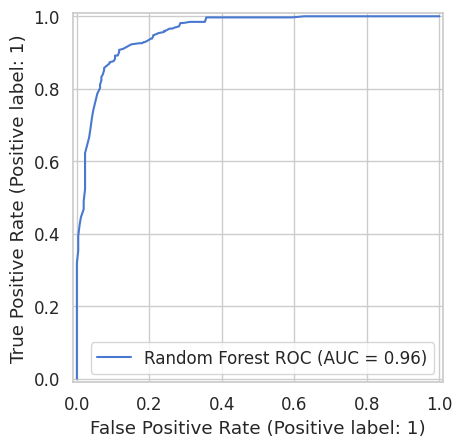

AUC (Random Forest): 0.9566156102330129


In [39]:
#  Random Forest ROC & AUC
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)   # Random Forest doesn’t strictly need scaling

# Predicted probabilities (for class 1 = Heart Disease)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# ROC Curve
roc_display = RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest ROC")
plt.show()

# AUC score
print("AUC (Random Forest):", roc_auc_score(y_test, y_proba_rf))

# Positive or Negative Growth:

Positive: Accuracy improves with feature scaling and encoding. Random Forest showed strong predictive power (~85% accuracy, high AUC).

Negative: Logistic Regression was less effective compared to Random Forest, showing limitations in linear separation. Some features (e.g., Cholesterol) had outliers affecting model performance.